In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from display_xml import XML
import CLB.CLBXMLWriter as CLBXML   

In [2]:
! mkdir -p r_packages
! echo 'install.packages("jpeg", repos="http://cran.r-project.org", lib="r_packages")' | /usr/bin/R --slave

trying URL 'http://cran.r-project.org/src/contrib/jpeg_0.1-9.tar.gz'
Content type 'application/x-gzip' length 18596 bytes (18 KB)
downloaded 18 KB

* installing *source* package 'jpeg' ...
** package 'jpeg' successfully unpacked and MD5 sums checked
** using staged installation
** libs
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG     -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-jbaK_j/r-base-3.6.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c read.c -o read.o
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG     -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-jbaK_j/r-base-3.6.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c reg.c -o reg.o
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG     -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-jbaK_j/r-base-3.6.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c write.c -o write.o
gcc -

In [157]:
CLBc = CLBXML.CLBConfigWriter( )



CLBc.addGeomParam('nx', 160)
CLBc.addGeomParam('ny', 120)
CLBc.addGeomParam('nz', 2)


CLBc.addCollisionBlock(name='Collision')
CLBc.addBox()

CLBc.addWPressure()
CLBc.addBox(nx=1)

params = {
        "Viscosity":1/6.,
        "ForceX":0.05,
        "Magic": 3/16.,
        "LinearReactionRate": 0.01,
        "Diffusivity_PHI": 1./3.,
        "Init_PHI": 1E-5,
}

CLBc.addModelParams(params)


CLBc.addRunR(eval=\
f"""
    library('jpeg', lib="r_packages")
    
    myurl <- "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/M-18A_Dromader_CALM.jpg/160px-M-18A_Dromader_CALM.jpg"
    z <- tempfile()
    download.file(myurl,z,mode="wb", quiet=TRUE);
    pic <- readJPEG(z);
    file.remove(z) # cleanup
    
    y = Solver$Geometry$X / 160 -0.5
    x = Solver$Geometry$Y / 120 - 0.5
    
    #Solver$Fields$Init_PHI_External[] =  sin(2*pi*(y+0.5))^2;

    Solver$Fields$Permability[] = t(pic[,,1]) + 1E-8;
    #Solver$Fields$Permability[] = 1-exp(-15*(x*x+y*y)) + 1E-8;
    #Solver$Actions$InitFromExternalAction();
    
""")

CLBc.addHDF5()
time = 2000
solve = CLBc.addSolve(iterations=time)
CLBc.addHDF5(Iterations=time/10, parent=solve)
#CLBc.addHDF5()

CLBc.write('Pseudo2DReaction.xml')

#f = open('AllenCahnTrapezoidal.xml', 'r')
#XML(''.join(f.readlines()))

! rm -rf ./output/Pseudo2DReaction* && tclb auto_porous_media_d3q19_TRT_GinzburgEqOrd1 Pseudo2DReaction.xml > /dev/null


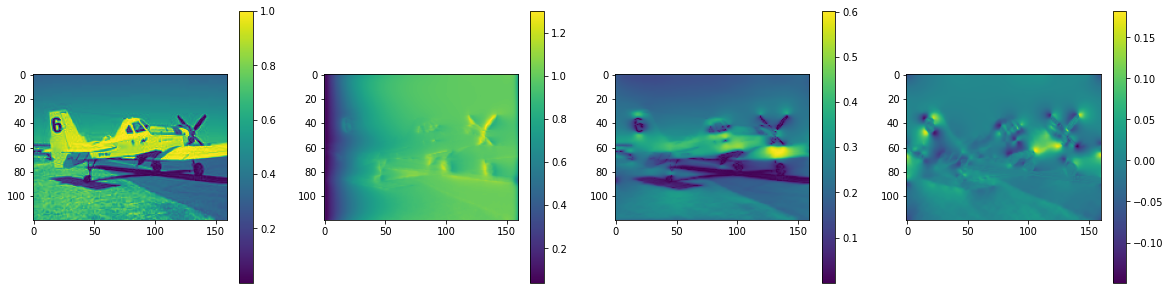

In [159]:
i = time
f = h5py.File('./output/Pseudo2DReaction_HDF5_%08d.h5'%i)    
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.imshow(f['Permability'][0,:,:])
plt.colorbar()
plt.subplot(142)
plt.imshow(f['PHI'][0,:,:])
plt.colorbar()
plt.subplot(143)
plt.imshow(f['U'][0,:,:,0])
plt.colorbar()
plt.subplot(144)
plt.imshow(f['U'][0,:,:,1])
plt.colorbar()


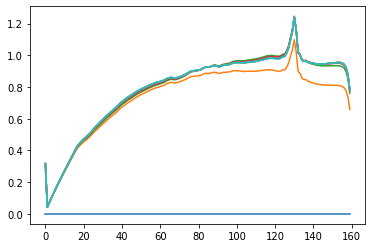

In [130]:
i = 0
for i in range(0,time,int(time/10)):
    f = h5py.File('./output/Pseudo2DReaction_HDF5_%08d.h5'%i)    
    plt.plot(f['PHI'][0,50,:])



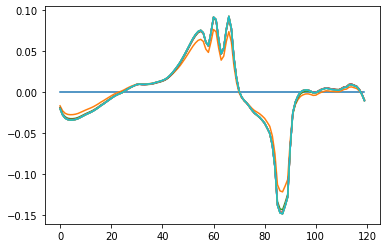

In [131]:
i = 0
for i in range(0,time,int(time/10)):
    f = h5py.File('./output/Pseudo2DReaction_HDF5_%08d.h5'%i)    
    plt.plot(f['PHI'][0,:,0] - np.average(f['PHI'][0,:,0]))



In [132]:
shape = f['U'][0,:,:,1].shape

X,Y = np.meshgrid(np.arange(shape[1]),np.arange(shape[0]))

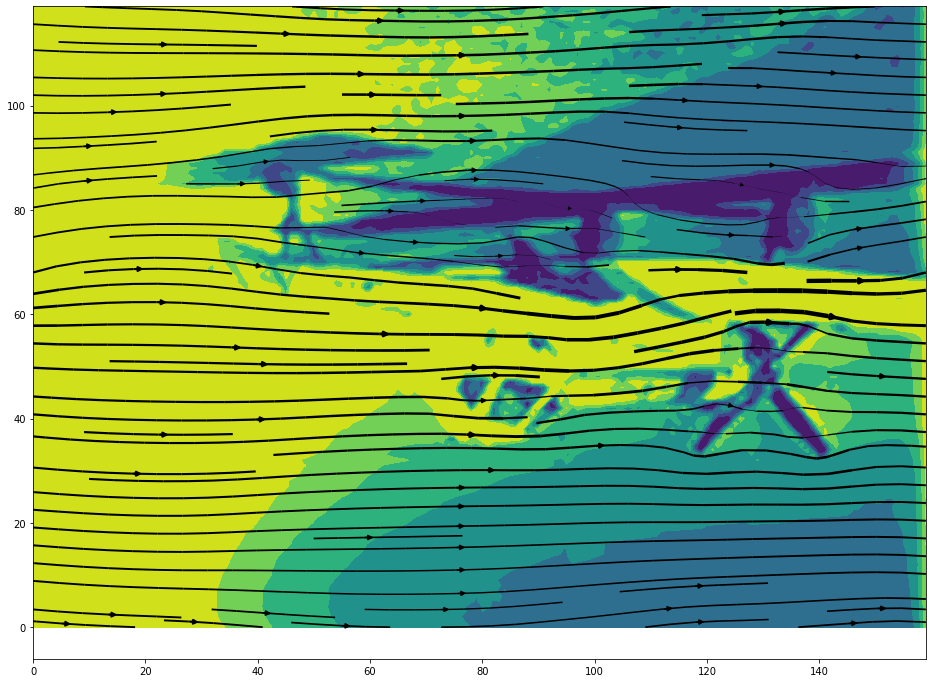

In [155]:
plt.figure(figsize=(16,12))
plt.contourf(X,Y,f['Permability'][0,:,:])

speed = np.sqrt( f['U'][0,:,:,0]**2  + f['U'][0,:,:,1]**2 )
lw = 5*speed / speed.max()


plt.streamplot(X,Y,f['U'][0,::1,:,0],f['U'][0,::1,:,1], density=1.2, color='k', linewidth=lw)

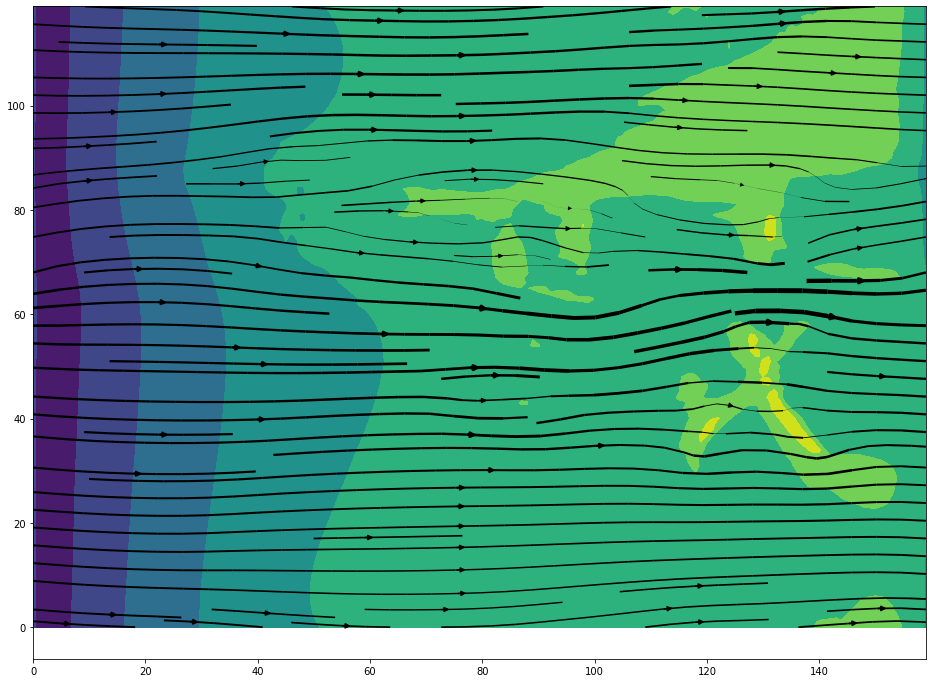

In [156]:
plt.figure(figsize=(16,12))
plt.contourf(X,Y,f['PHI'][0,:,:])

speed = np.sqrt( f['U'][0,:,:,0]**2  + f['U'][0,:,:,1]**2 )
lw = 5*speed / speed.max()


plt.streamplot(X,Y,f['U'][0,::1,:,0],f['U'][0,::1,:,1], density=1.2, color='k', linewidth=lw)

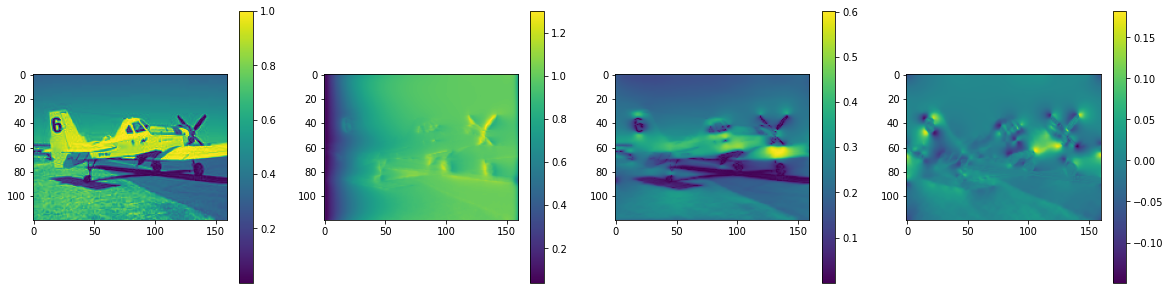

0


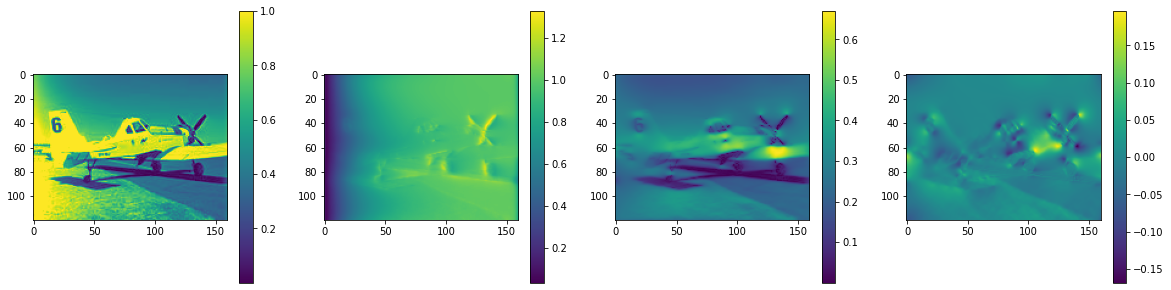

1


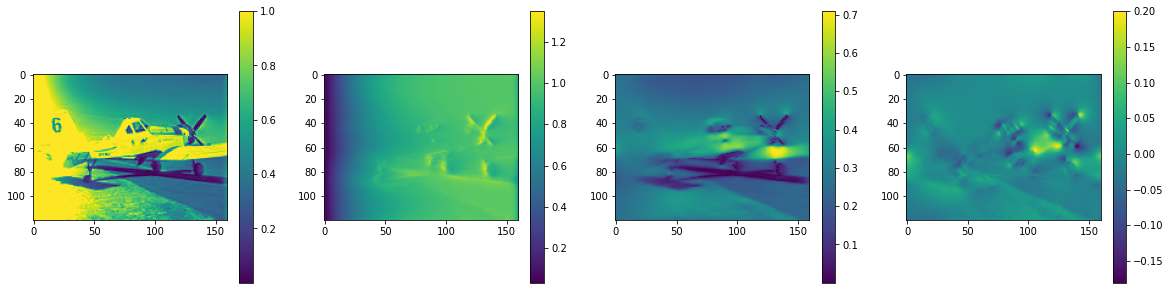

2


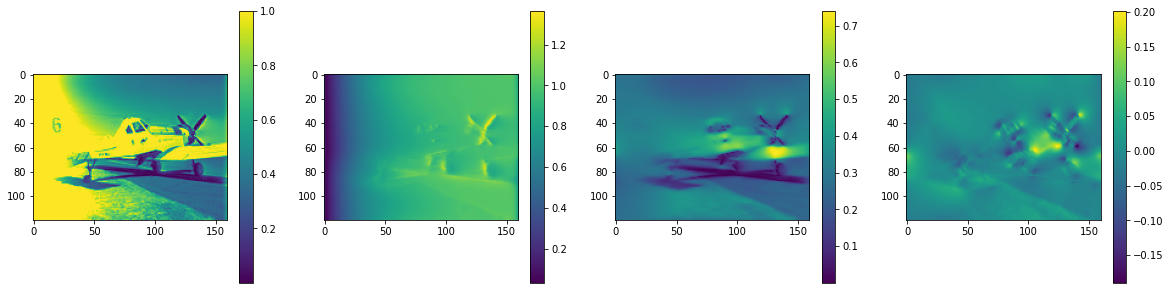

3


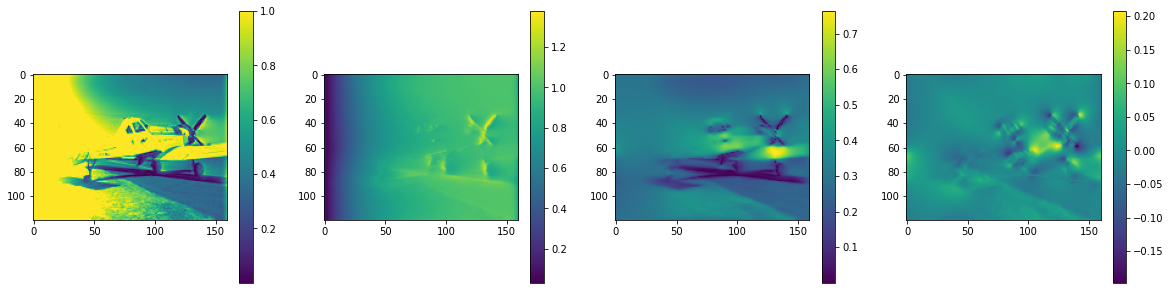

4


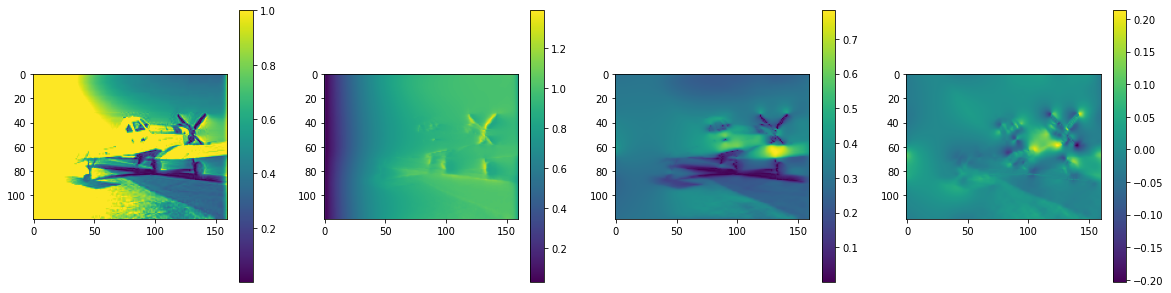

5


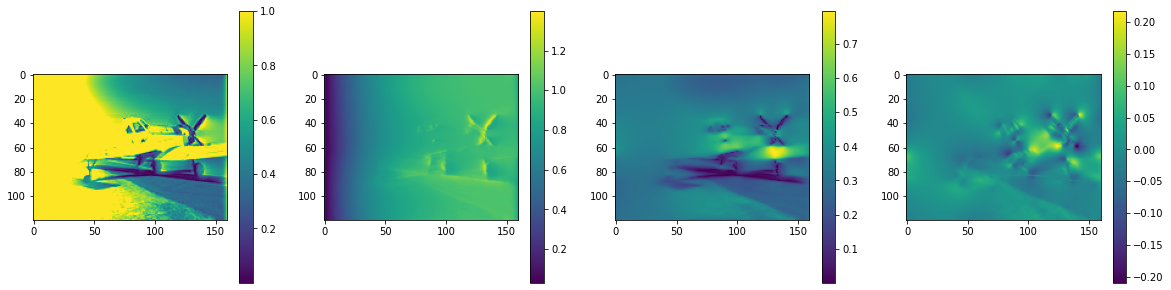

6


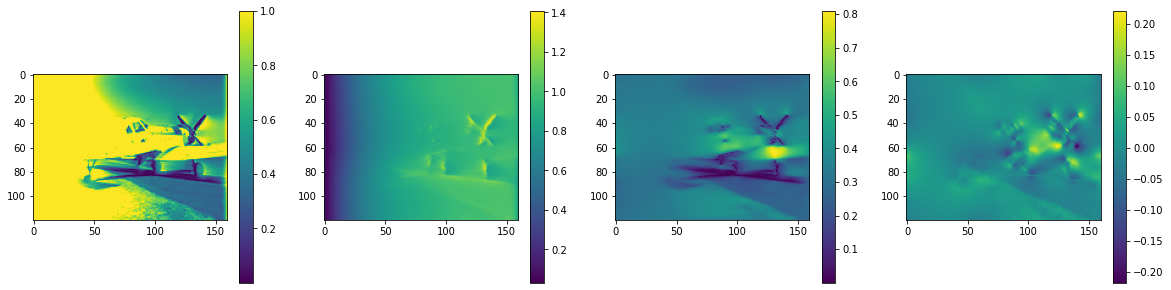

7


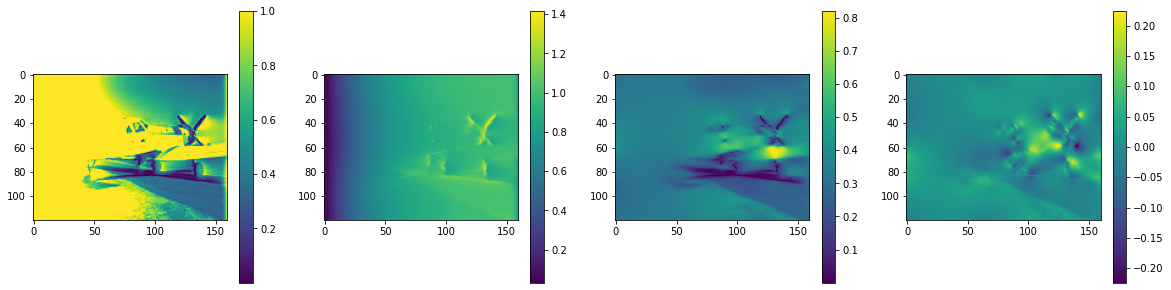

8


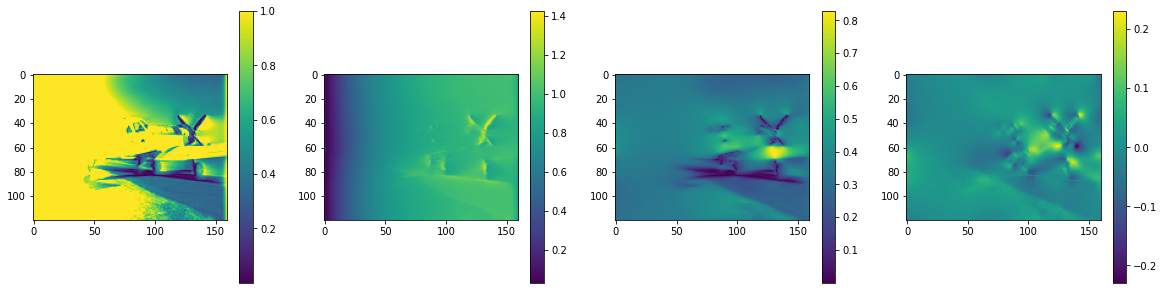

9


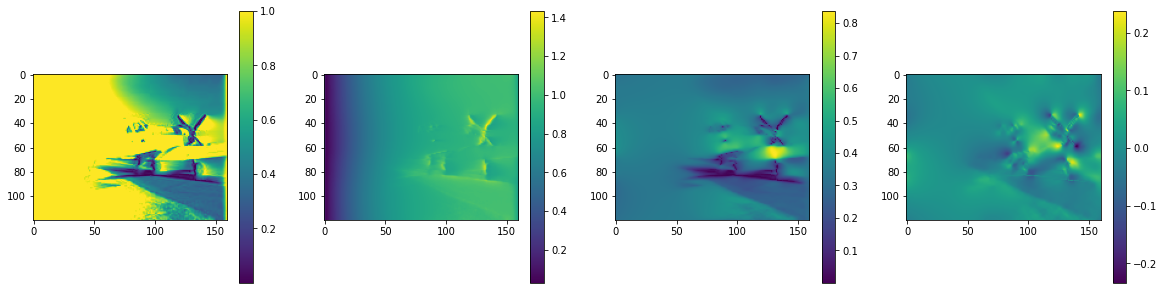

10


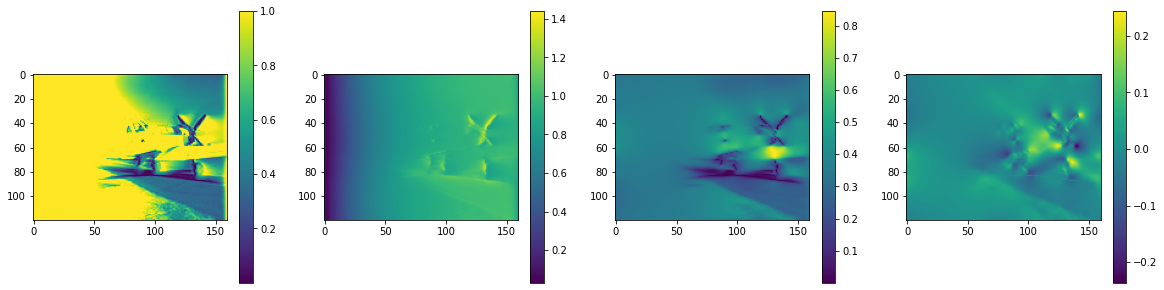

11


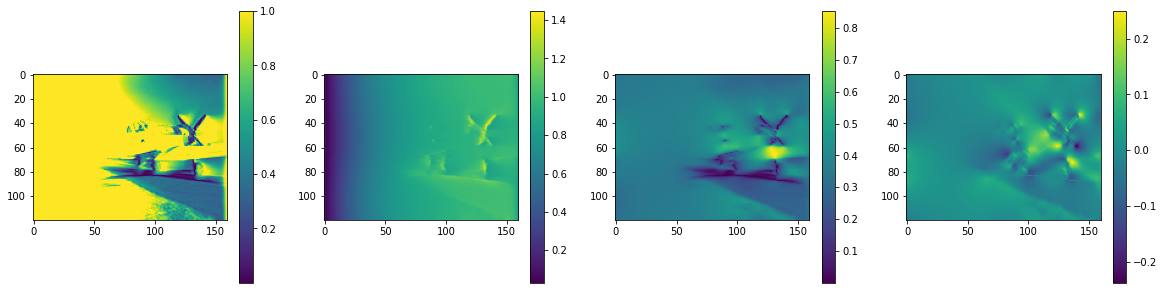

12


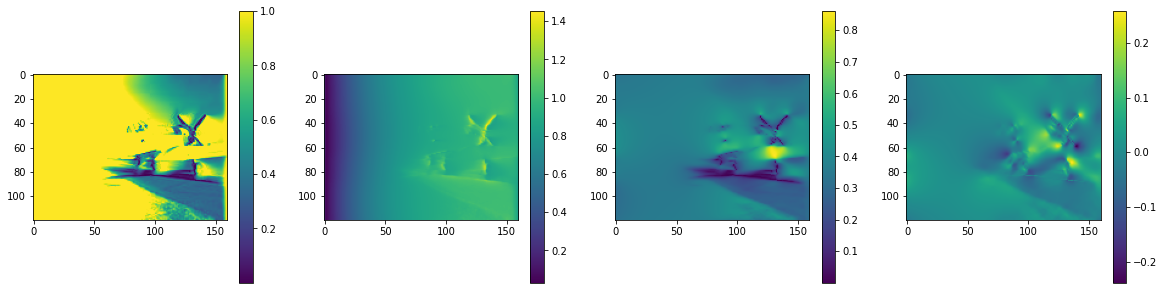

13


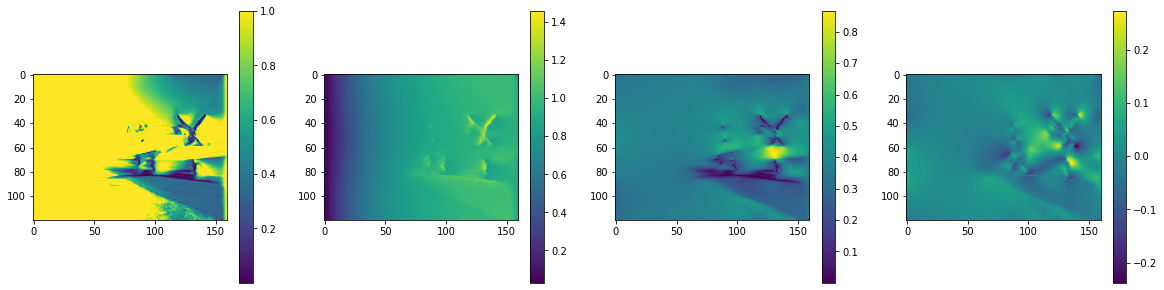

14


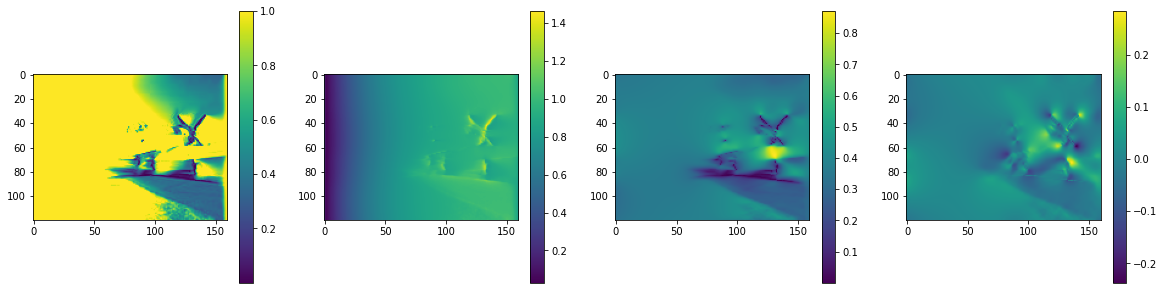

15


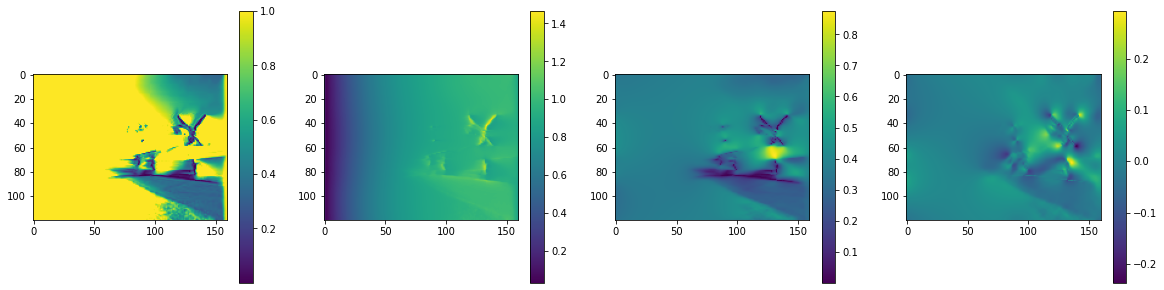

16


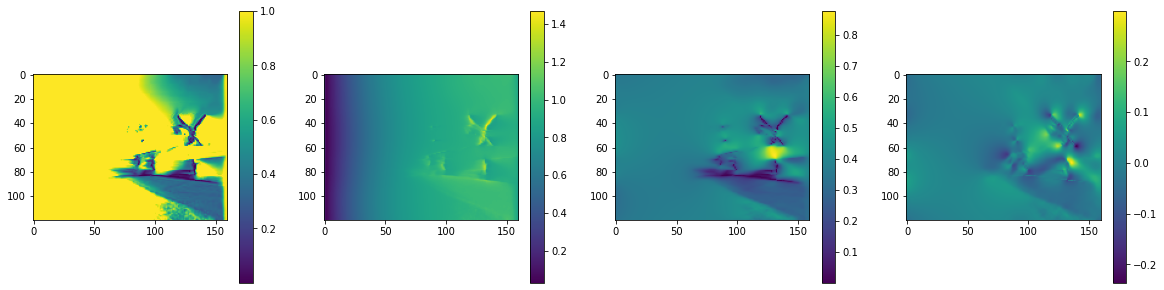

17


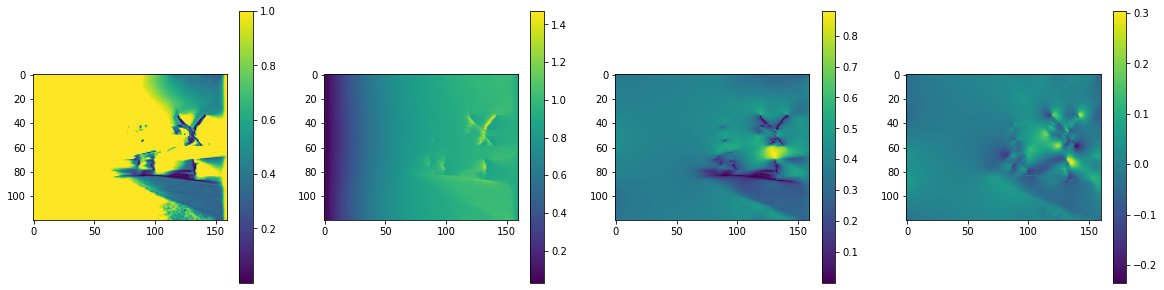

18


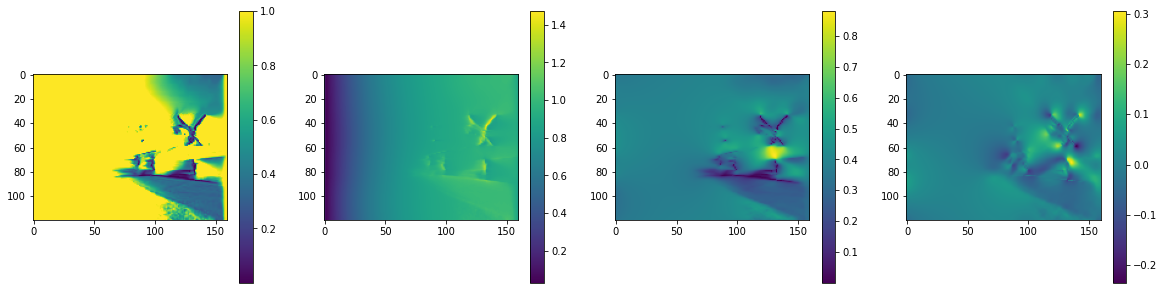

19


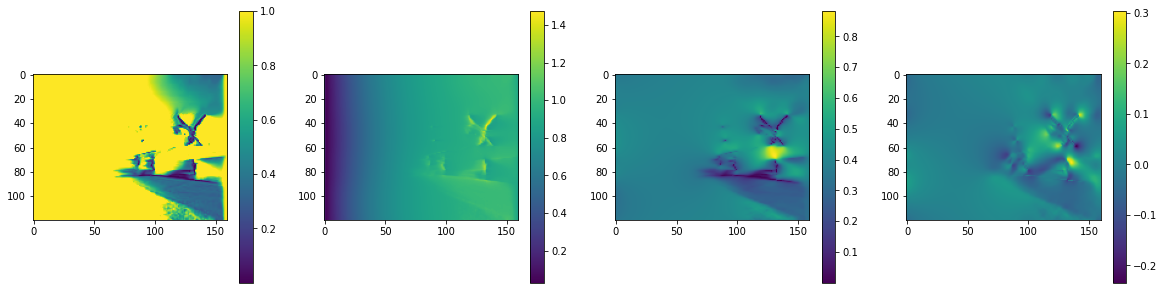

20


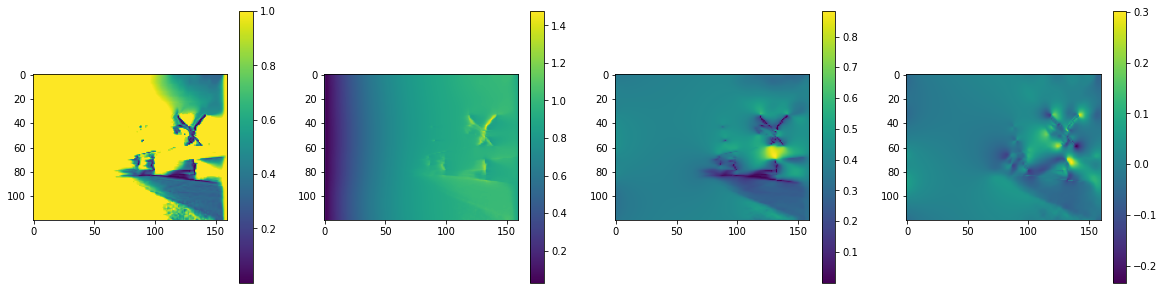

21


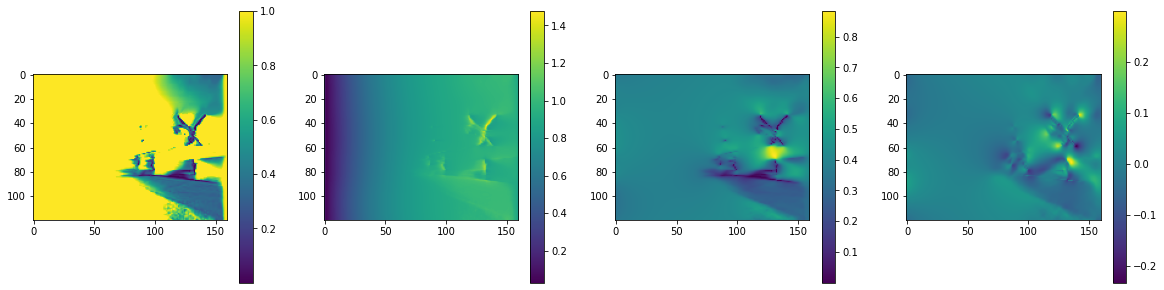

22


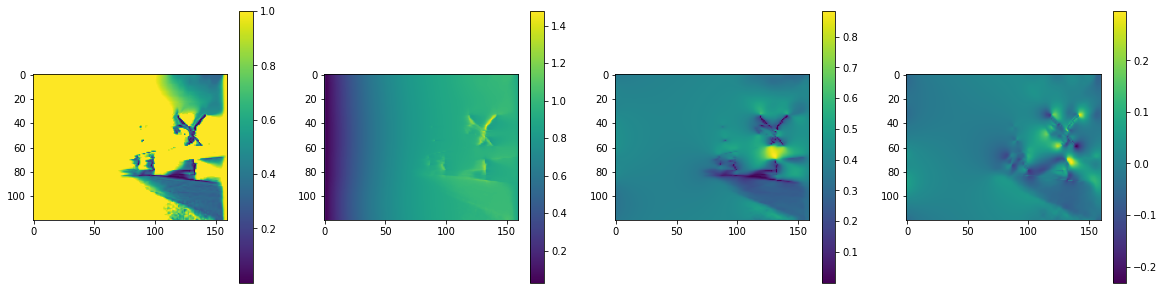

23


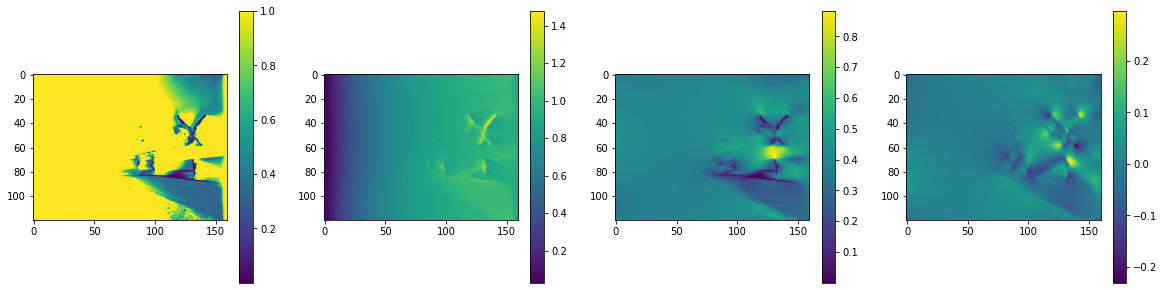

24


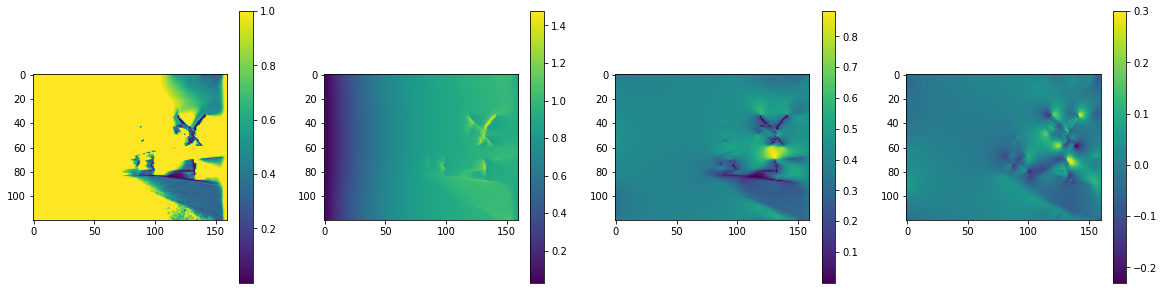

25


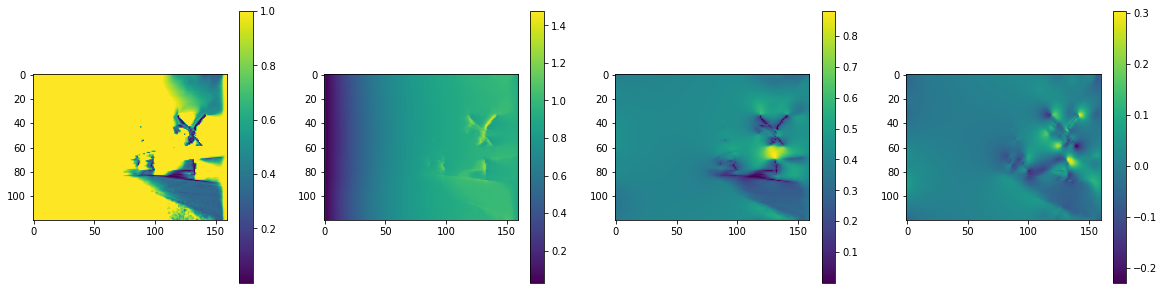

26


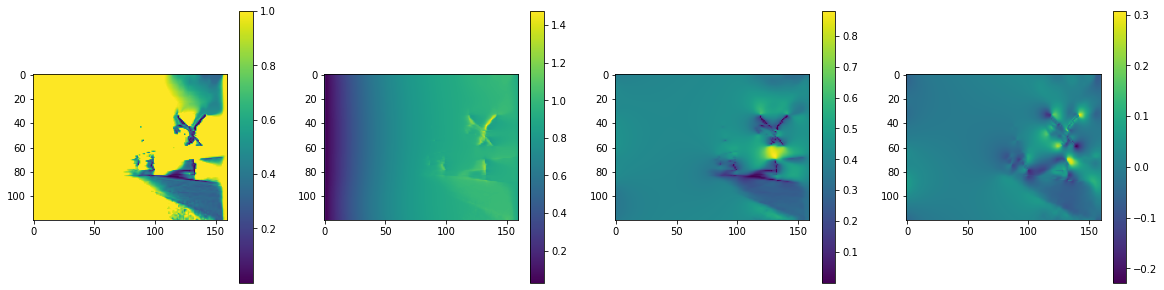

27


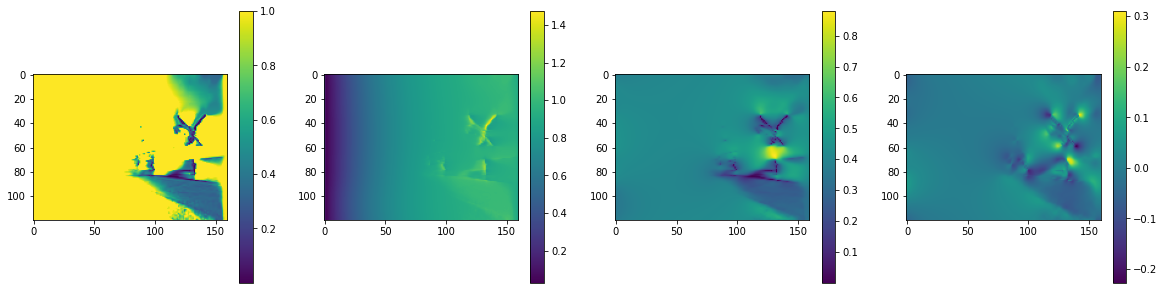

28


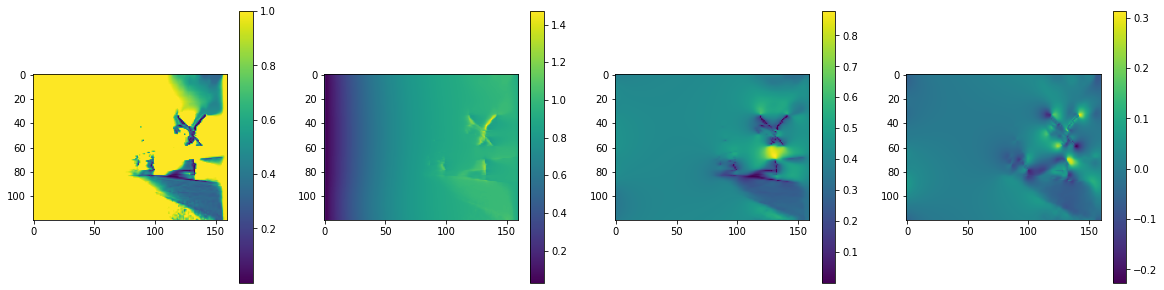

29


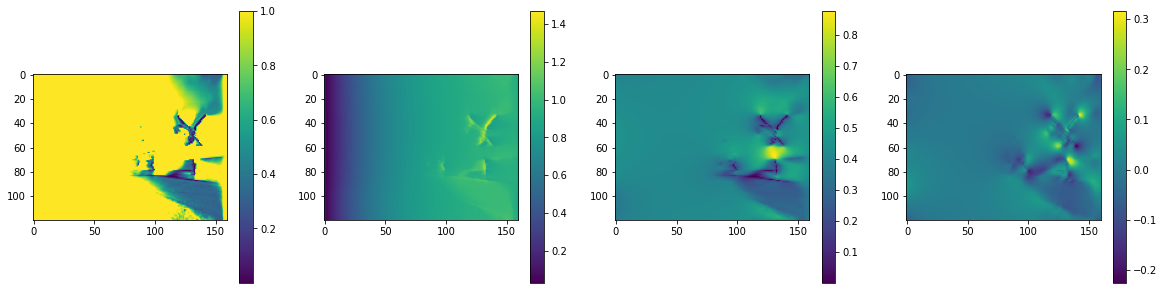

30


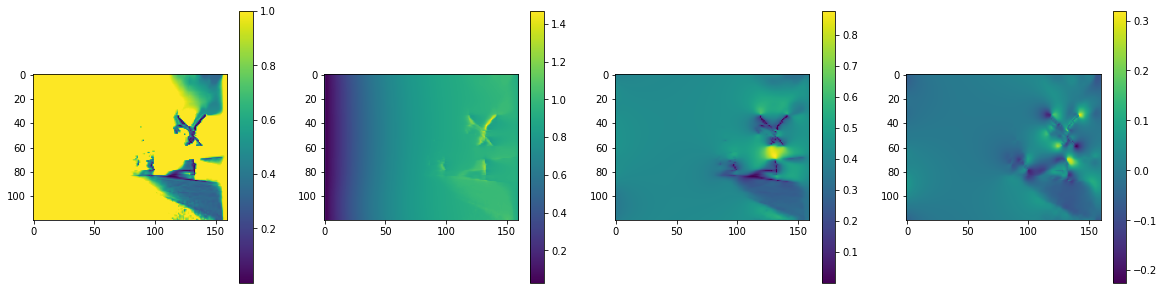

31


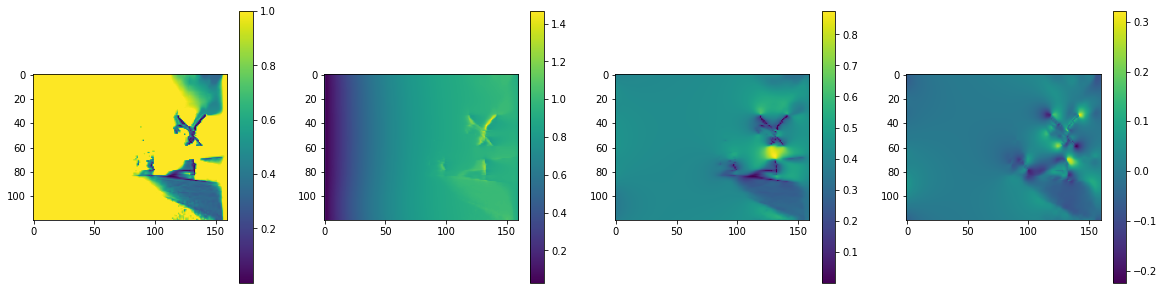

32


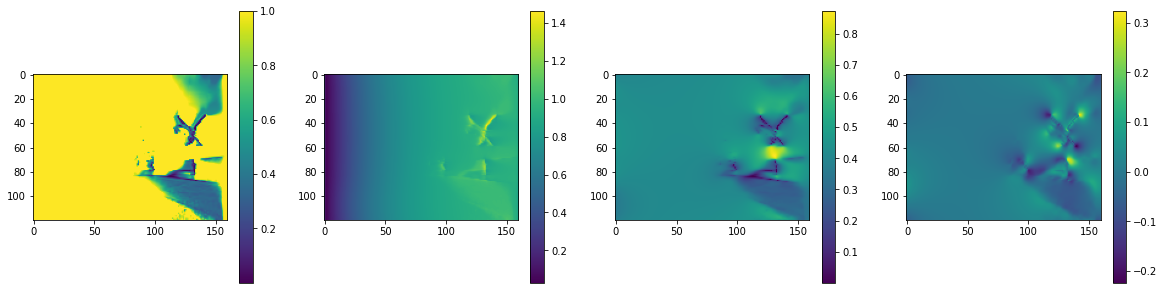

33


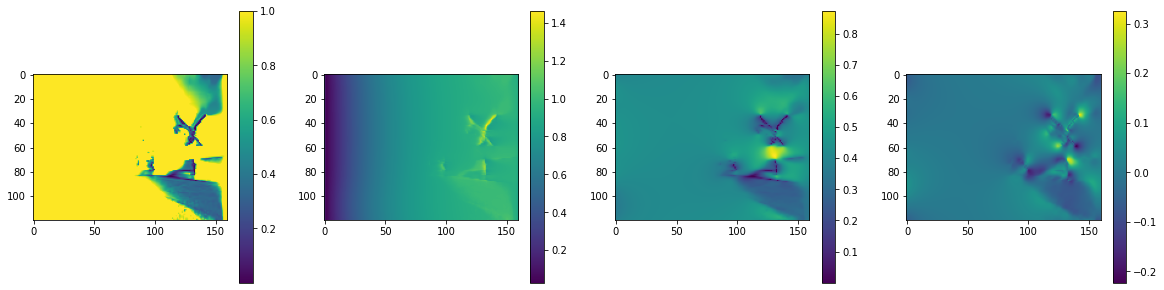

34


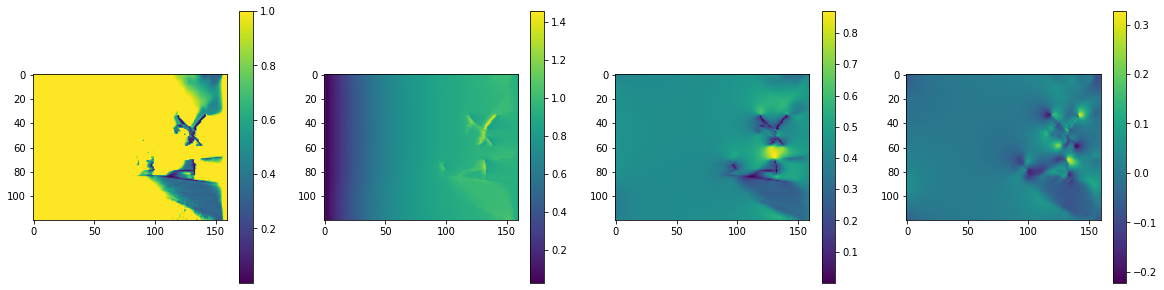

35


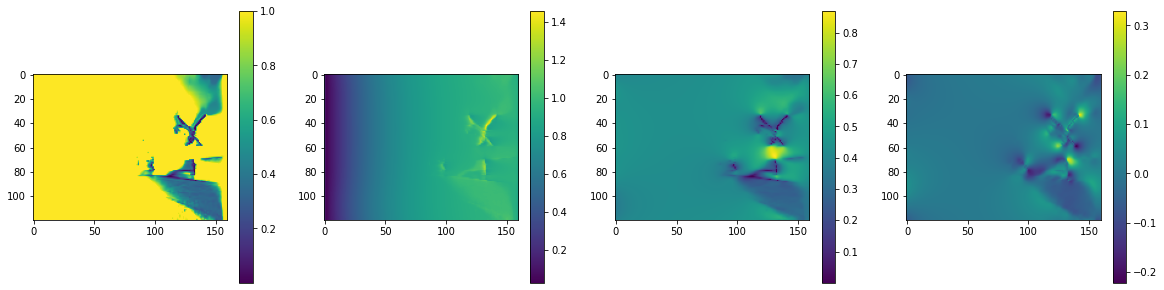

36


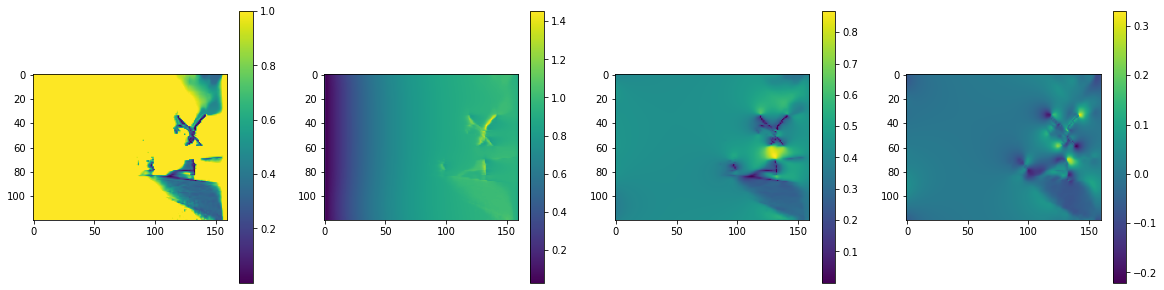

37


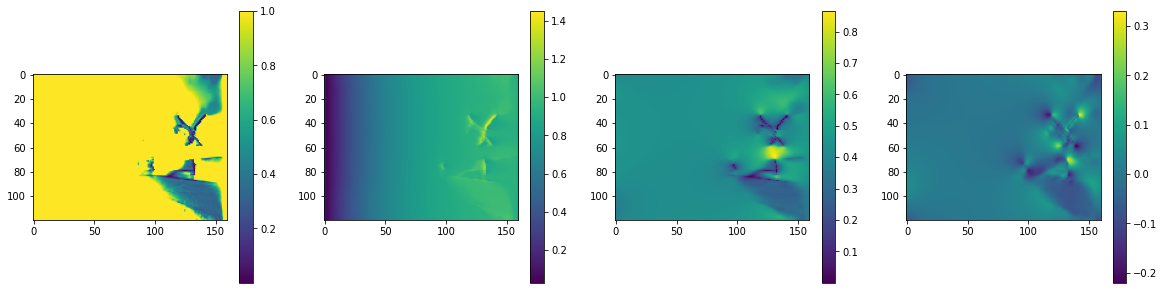

38


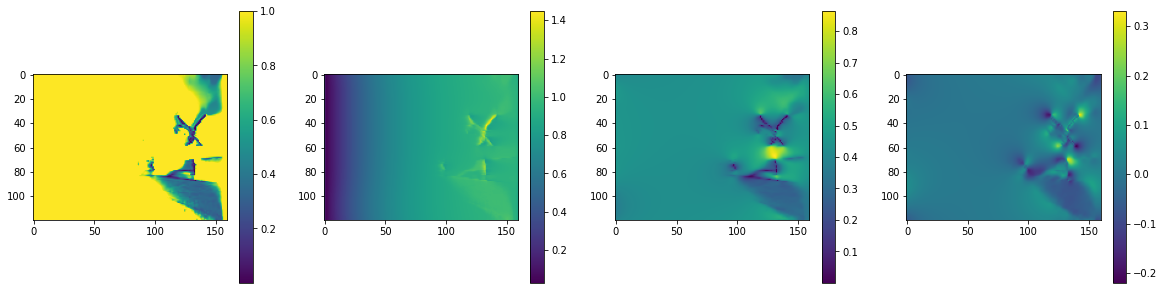

39


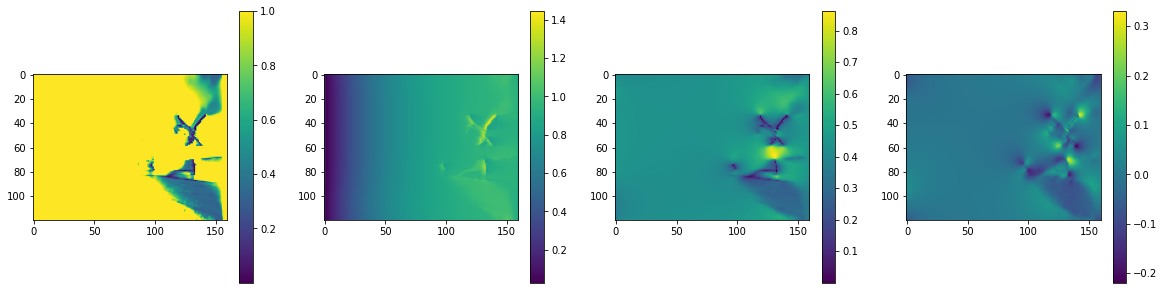

In [160]:
i = time
f = h5py.File('./output/Pseudo2DReaction_HDF5_%08d.h5'%i)    
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.imshow(f['Permability'][0,:,:])
plt.colorbar()
plt.subplot(142)
plt.imshow(f['PHI'][0,:,:])
plt.colorbar()
plt.subplot(143)
plt.imshow(f['U'][0,:,:,0])
plt.colorbar()
plt.subplot(144)
plt.imshow(f['U'][0,:,:,1])
plt.colorbar()
plt.show()


Phi = f['PHI'][0,:,:]
Phi[Phi>1] = 1
# plt.imshow(Phi)
# plt.colorbar()
# plt.figure()
Permability = f['Permability'][0,:,:] + (1-Phi)*0.5
Permability[Permability>1] = 1
# plt.imshow(Permability)
# plt.colorbar()

init_binfile = open('permability.bin', 'wb')
#init_binfile.write(np.copy(permability.swapaxes(1,2),order='C'))
init_binfile.write(np.copy(Permability,order='C'))
init_binfile.close()

    # plt.show()
for kk in range(40):
    print(kk)
    CLBc = CLBXML.CLBConfigWriter()

    dim = [160,120,2]

    CLBc.addGeomParam('nx', 160)
    CLBc.addGeomParam('ny', 120)
    CLBc.addGeomParam('nz', 2)


    CLBc.addCollisionBlock(name='Collision')
    CLBc.addBox()

    CLBc.addWPressure()
    CLBc.addBox(nx=1)

    params = {
            "Viscosity":1/6.,
            "ForceX":0.05,
            "Magic": 3/16.,
            "LinearReactionRate": 0.01,
            "Diffusivity_PHI": 1./3.,
            "Init_PHI": 1E-5,
    }

    CLBc.addModelParams(params)


    CLBc.addRunR(eval=\
    f"""
        con <- file("permability.bin", "rb")
        init <- matrix( readBin(con, "numeric", prod({dim[0]*dim[1]*dim[2]})), c({dim[2]},{dim[1]},{dim[0]}))
        close(con)
        Solver$Fields$Permability[] = init;   

    """)

    CLBc.addHDF5()
    time = 2000
    solve = CLBc.addSolve(iterations=time)
    CLBc.addHDF5(Iterations=time/10, parent=solve)
    #CLBc.addHDF5()

    CLBc.write('Pseudo2DReaction.xml')


    ! rm -rf ./output/Pseudo2DReaction* && tclb auto_porous_media_d3q19_TRT_GinzburgEqOrd1 Pseudo2DReaction.xml > /dev/null

    i = time
    f = h5py.File('./output/Pseudo2DReaction_HDF5_%08d.h5'%i)    
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    plt.imshow(f['Permability'][0,:,:])
    plt.colorbar()
    plt.subplot(142)
    plt.imshow(f['PHI'][0,:,:])
    plt.colorbar()
    plt.subplot(143)
    plt.imshow(f['U'][0,:,:,0])
    plt.colorbar()
    plt.subplot(144)
    plt.imshow(f['U'][0,:,:,1])
    plt.colorbar()
    plt.show()


    Phi = f['PHI'][0,:,:]
    Phi[Phi>1] = 1
    # plt.imshow(Phi)
    # plt.colorbar()
    # plt.figure()
    Permability = f['Permability'][0,:,:] + (1-Phi)*0.5
    Permability[Permability>1] = 1
    # plt.imshow(Permability)
    # plt.colorbar()

    init_binfile = open('permability.bin', 'wb')
    #init_binfile.write(np.copy(permability.swapaxes(1,2),order='C'))
    init_binfile.write(np.copy(Permability,order='C'))
    init_binfile.close()